In [499]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [500]:
df=pd.read_csv("C:\\Users\\shekh\\Downloads\\Algerian_forest_fires_dataset_UPDATE.csv", header=1)

In [501]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [502]:
#we need to drop rows which are mentioning regions as they are not useful to us bejaia and sidi-bel
df.drop([122,123], inplace=True)
df.reset_index(inplace=True)

In [503]:
df.drop('index',axis=1,inplace=True)

In [504]:
#now we have to metion the region respective to there rows
df.loc[:122,'Region']='bejaia'
df.loc[122:,'Region']='sidi bel'


In [505]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,sidi bel
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,sidi bel
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,sidi bel
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,sidi bel
243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,sidi bel


In [506]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

In [507]:
df.shape

(244, 15)

In [508]:
df[df.duplicated()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


## Exploring and cleaning the data

### Features in the dataset
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire



In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


##### here we can see that data types are what it seems in the data we need to change the data types 

In [510]:
df.columns=df.columns.str.strip() #this will remove the uneccessary spaces in the columns

In [513]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [514]:
df.Classes.unique() #here we can see the spaces we have to remvoe it

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [515]:
df.Classes=df.Classes.str.strip()

In [516]:
df.Classes.unique()

array(['not fire', 'fire', nan], dtype=object)

###### changinf the datatype

In [517]:
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)
df[['BUI', 'Rain','FFMC', 'DMC','ISI']]=df[['BUI', 'Rain','FFMC', 'DMC','ISI']].astype(float)

In [518]:
#as below we could not convert FWI to float data type because of 'fire  ' str present init , we replaced with random no
#same with DC as in it '14.6 9' was present, we replace it with '14.69' and made it to float

In [519]:
df['FWI']=df['FWI'].replace('fire   ',np.random.randint(1,10))

In [520]:
df['FWI']=df['FWI'].astype(float)

In [524]:
df['DC']=df['DC'].replace('14.6 9','14.69' )

In [525]:
df['DC']=df['DC'].astype(float)

In [526]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
Region          object
dtype: object

In [527]:
df[df.duplicated()] #there are no dupilcates

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [528]:
df.shape

(244, 15)

In [531]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.039344
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.425499
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.450000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [532]:
df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
Region           2
dtype: int64

In [533]:
#encoding the region because it has 2 categories 
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [534]:
df['Region']=labelencoder.fit_transform(df['Region'])

In [535]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
Region         0
dtype: int64

### univariate analysis

In [536]:
numeric_fea=[fea for fea in df.columns if df[fea].dtype!='O']
print(f'Numeric features are : {numeric_fea}')

Numeric features are : ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region']


C:\Users\shekh\anaconda\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


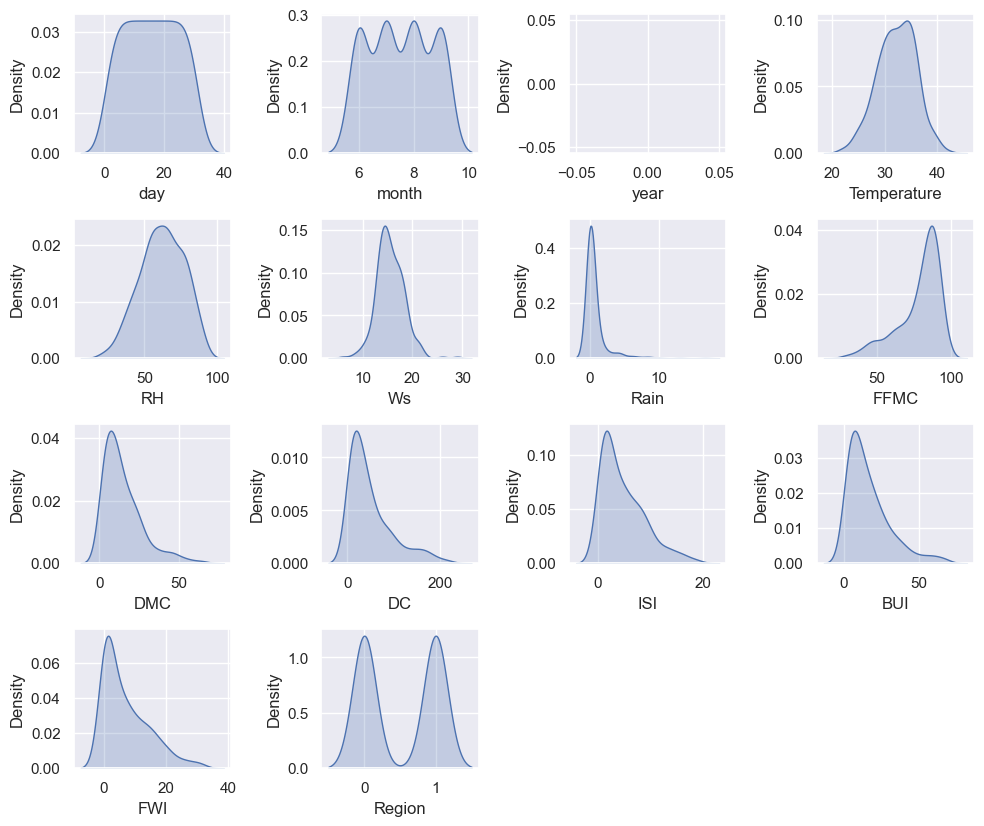

In [538]:
plt.figure(figsize=(10,10))
for i in range(len(numeric_fea)):
    plt.subplot(5,4,i+1)
    sns.kdeplot(df[numeric_fea[i]], shade='blue')
    plt.tight_layout()

* As we can see Temperature is normally distributed with little skewness
* rain is right skewed with outliers in the tail 
* FFMC(fine fuel moisture code) is left skewed and outliers are in there
* DMC(duff moisture code) is right skewed and has outliers left tail end
* BUI(buildup index) this is also right skewed with outliers in tail end
* FWI(fire weather index) this is also right skewed with outliers in tail end


* as given in the assignment we have to take the Temperature as dependent feature(output feature) and remaining as independent features

<AxesSubplot: >

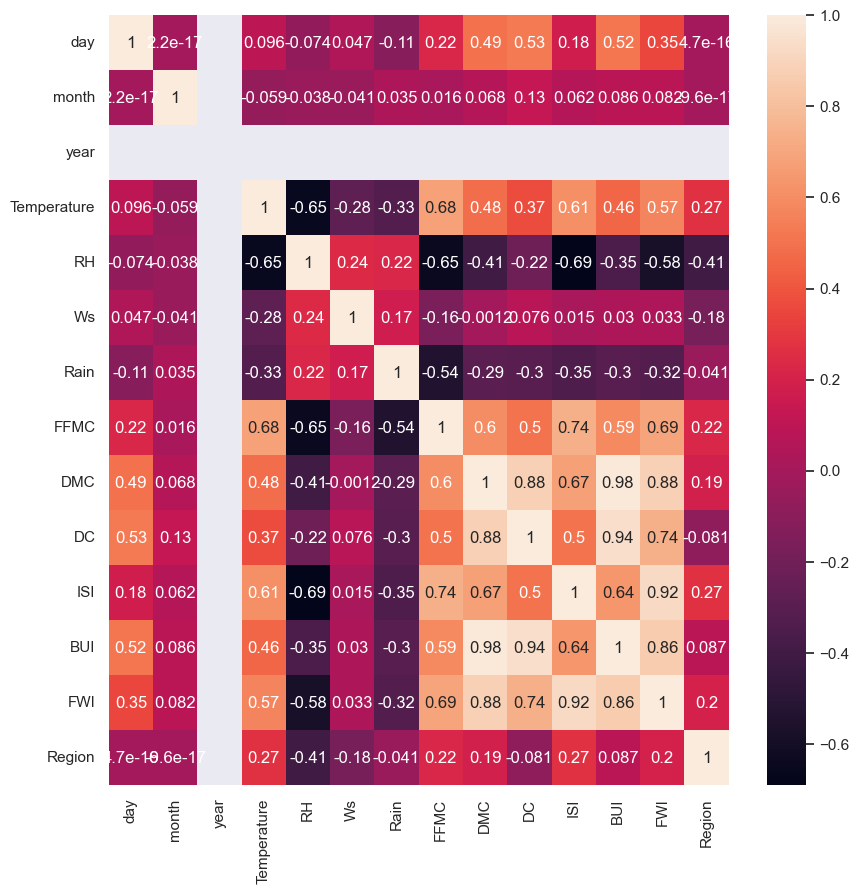

In [539]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

* As given Temperature is our output feature
* Temperature has negative correlation with RH
* WH also show negative correaltion with temperature
* FFMC has 68% correlation with temperature
* ISI also show somewhat good correlation with temperature

Text(0, 0.5, 'Temperature')

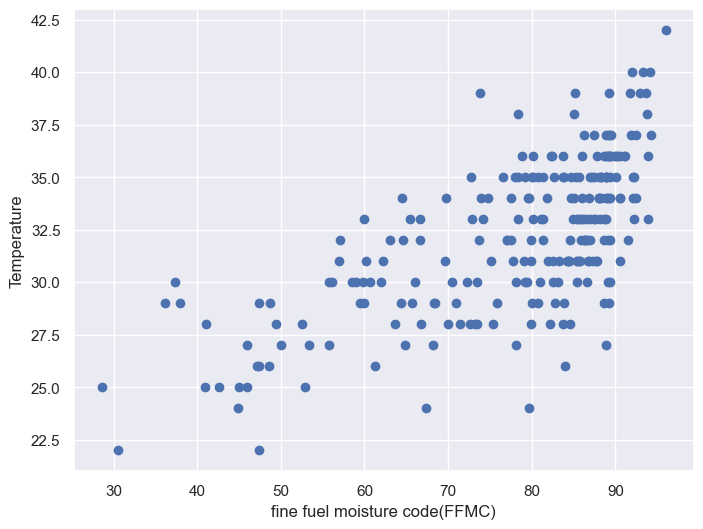

In [540]:
sns.set(rc={'figure.figsize':(8,6)})
plt.scatter(df['FFMC'], df['Temperature'])
plt.xlabel('fine fuel moisture code(FFMC)')
plt.ylabel('Temperature')

* as we can see in above graph as the ffmc increases temperature also increases

Text(0, 0.5, 'Temperature')

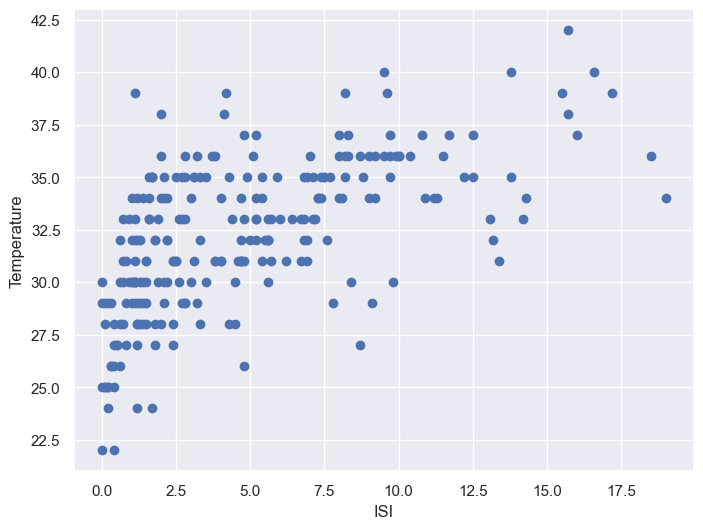

In [541]:
sns.set(rc={'figure.figsize':(8,6)})
plt.scatter(df['ISI'], df['Temperature'])
plt.xlabel('ISI')
plt.ylabel('Temperature')

* here same as ISI increases temperature increases

Text(0, 0.5, 'Temperature')

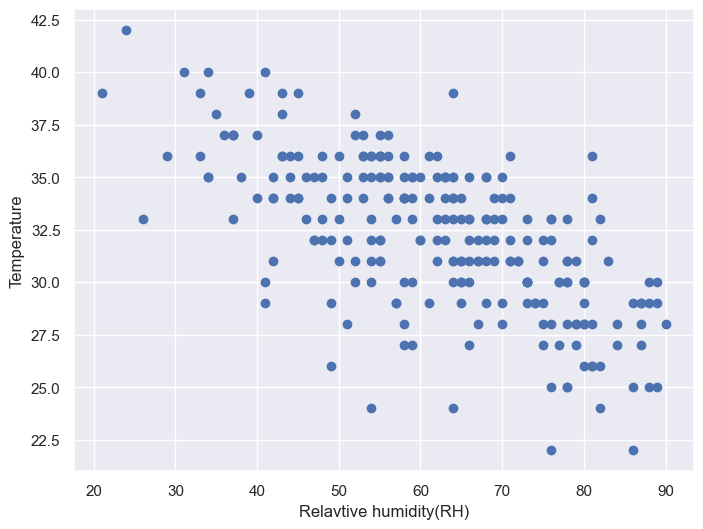

In [543]:
plt.scatter(df['RH'],df['Temperature'])
plt.xlabel('Relavtive humidity(RH)')
plt.ylabel('Temperature')

* as we can see above that if the temperature increases the relative humidity also increases

### reg plots

* as we can see regression plot we see the best fit line and the shade region means we can change the line using lasso, ridge or elastic net

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Region']

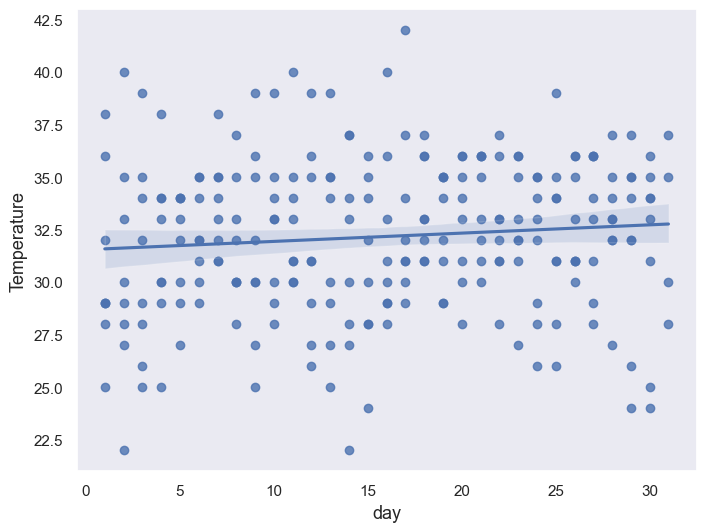

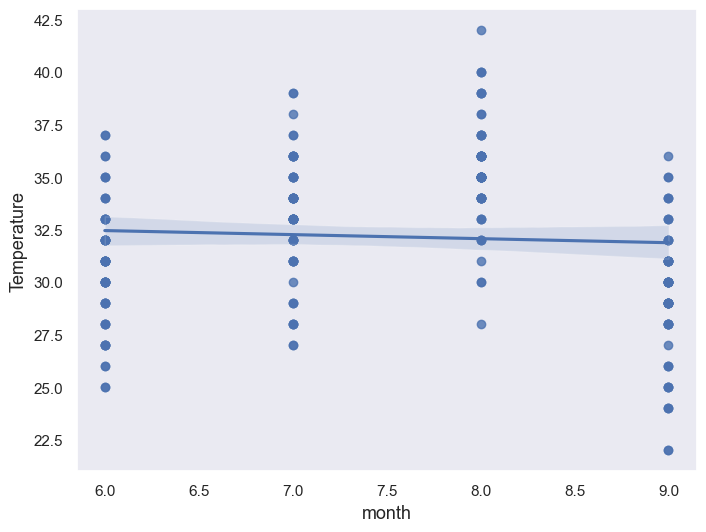

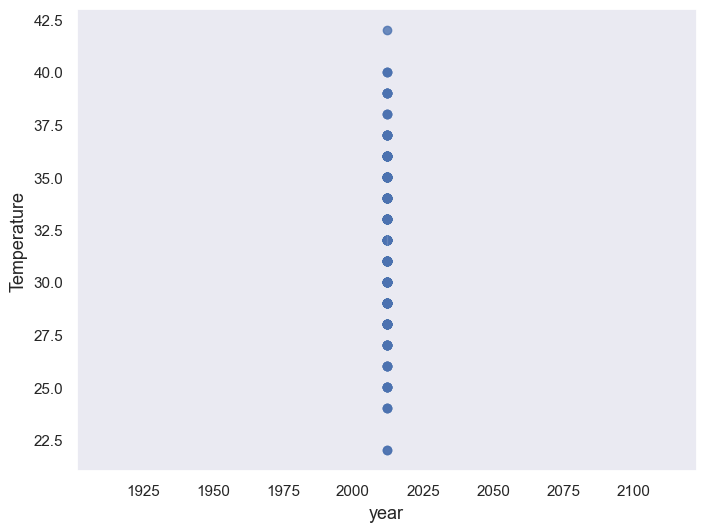

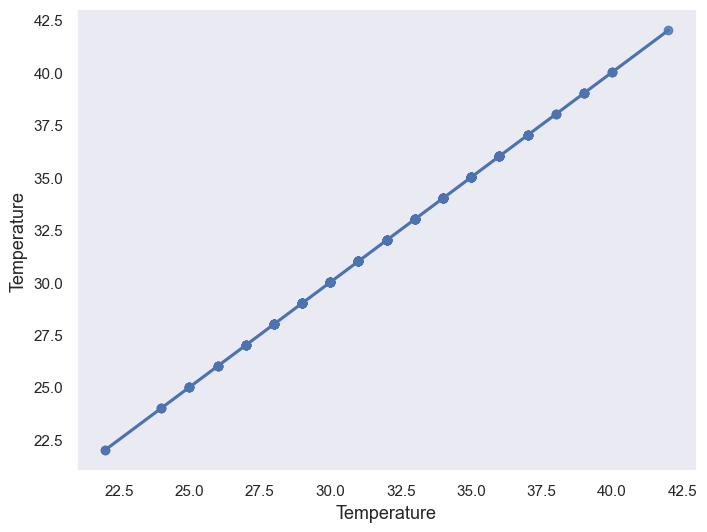

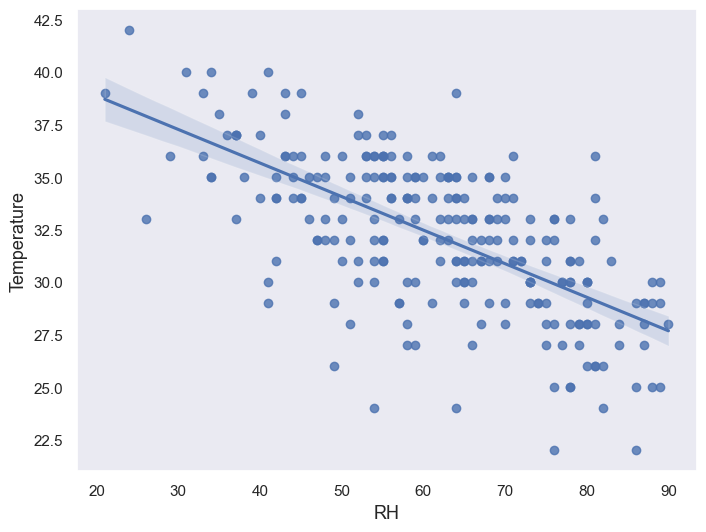

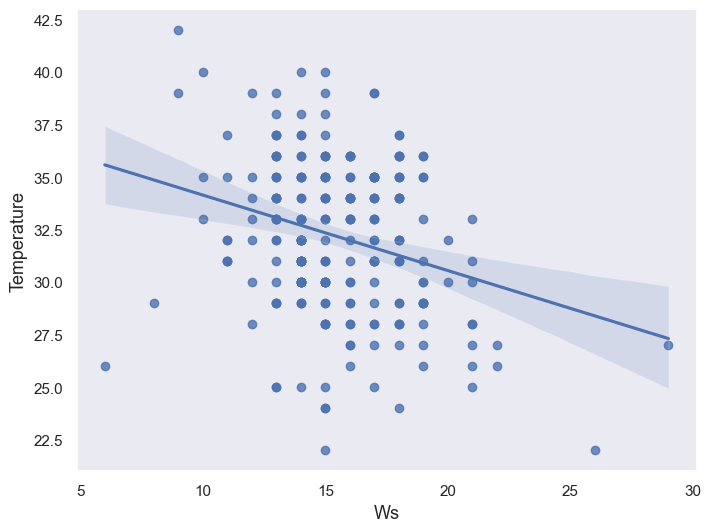

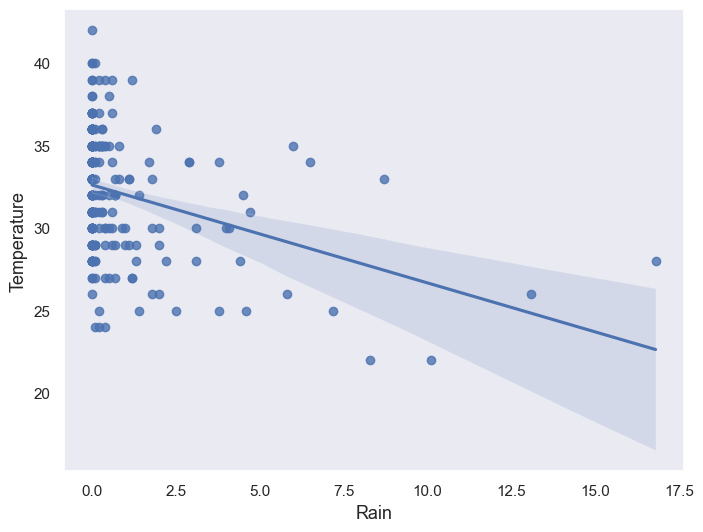

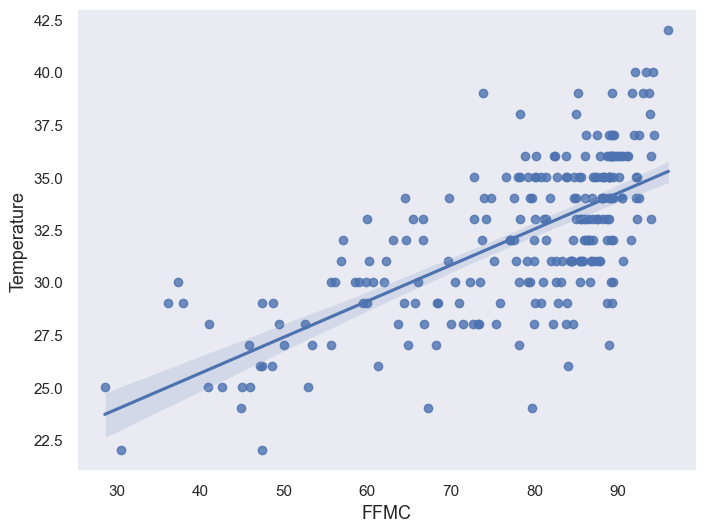

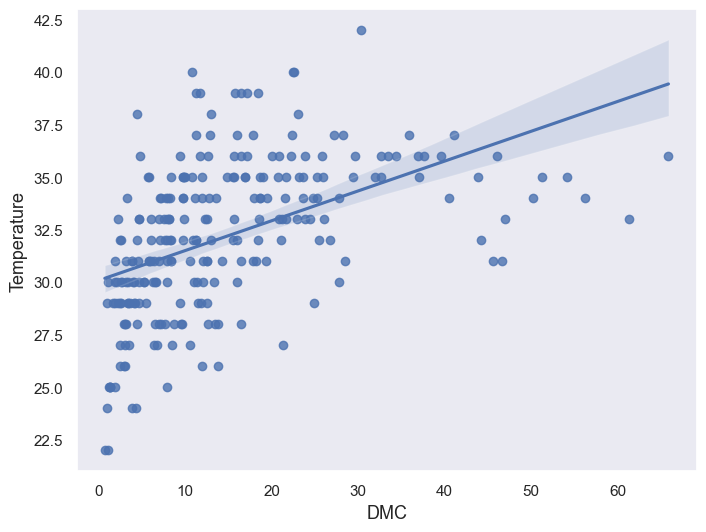

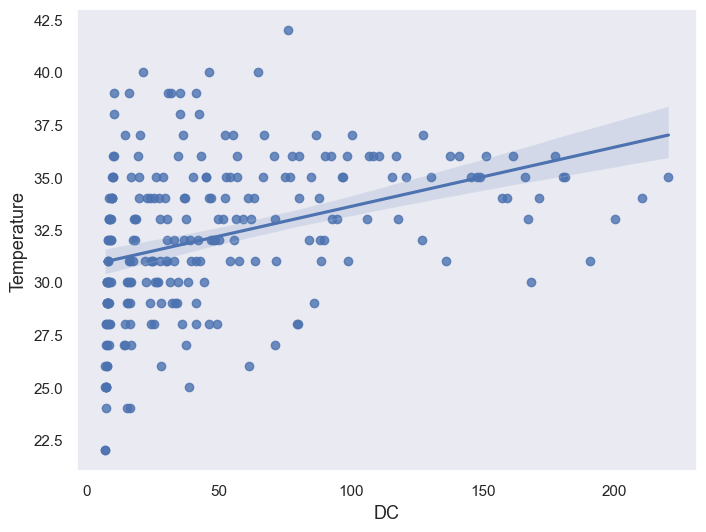

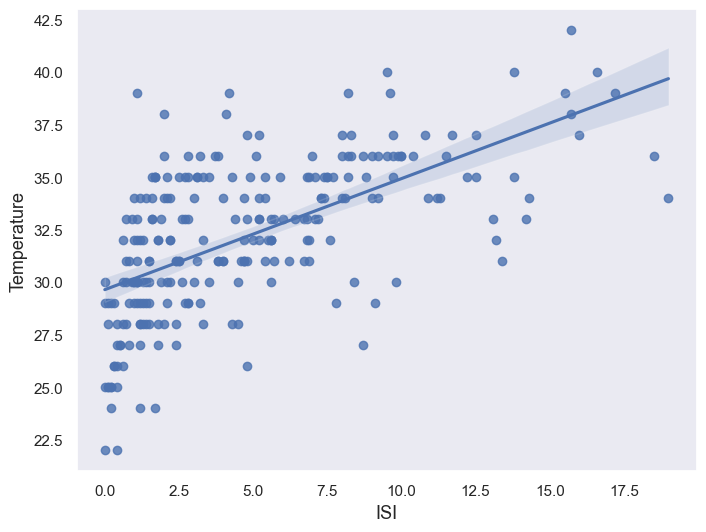

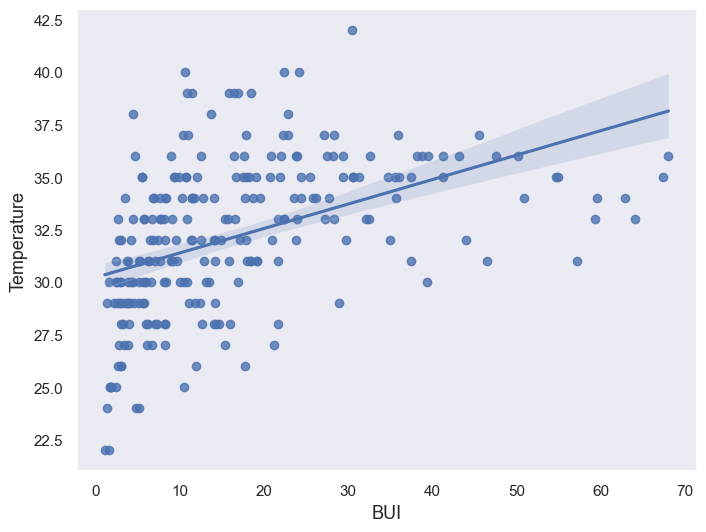

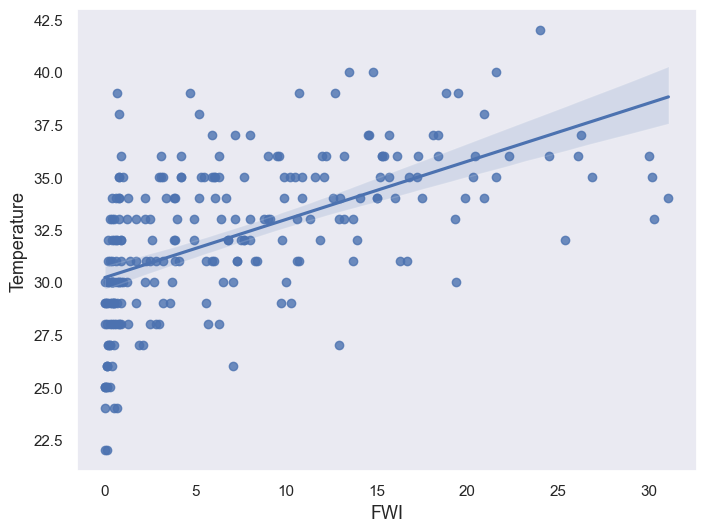

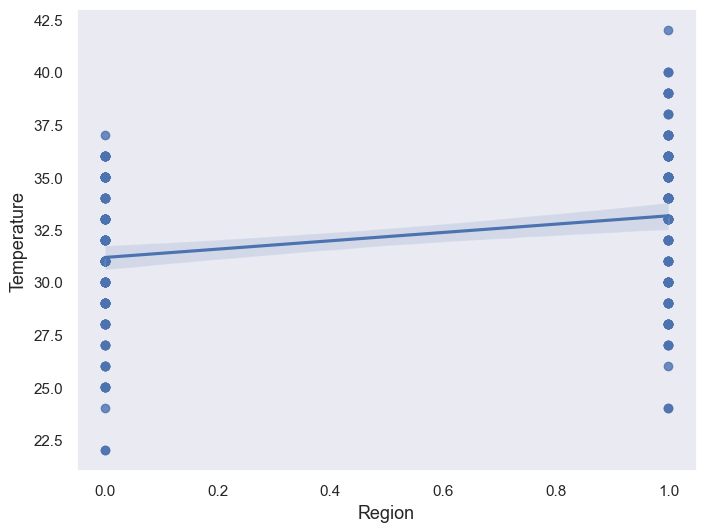

In [545]:
A=numeric_fea
b='Temperature'

for col in A:
    sns.regplot(x = col, y = b, data = df)
    plt.xlabel(col, fontsize = 13)
    plt.ylabel(b, fontsize = 13)
    plt.grid()
    plt.show()
    

* as we can see regression plot we see the best fit line and the shade region means we can change the line using lasso, ridge or elastic ne

Text(0.5, 1.0, 'Temperature outlier checking')

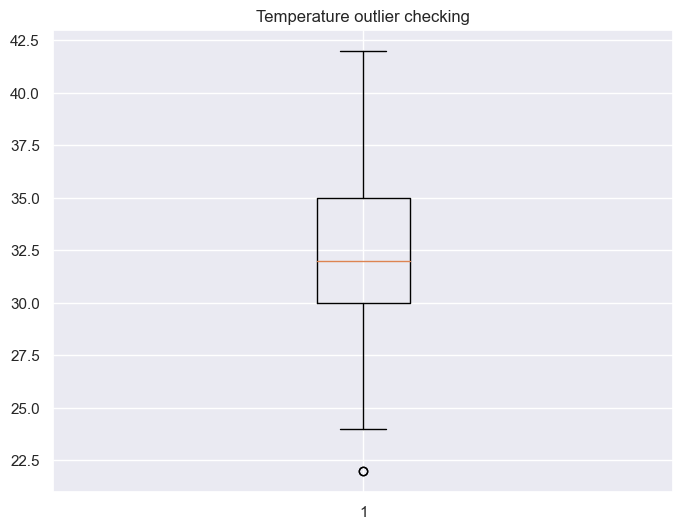

In [546]:
#we have to check that if our target feature has outliers or not
plt.boxplot(df['Temperature'])
plt.title('Temperature outlier checking')

* As we can see the outlier marked

# taking out the dependent and independent feature
* as mentioned in the assignment we have 'Temperature' is the target feature which is dependent
* 'day', 'month', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region' are the independent features
* we have to take them out seperatly

In [547]:
df_copied=df.copy()

In [ ]:
df_copied

In [548]:
# as we do not need year because it is same for all year and we also don't need Classes column as in assignment output feature is temperature
df_copied.drop(['year','Classes'],axis=1, inplace=True)

In [549]:
df_copied.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [551]:
x=df_copied.drop(['Temperature'], axis=1)
y=df_copied['Temperature']

In [552]:
x.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [553]:
y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temperature, dtype: int32

# Linear regression
#### TRAIN SPLIT

In [554]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=0.33,random_state=10)

In [555]:
x_train.shape

(163, 12)

In [556]:
x_test.shape

(81, 12)

In [557]:
y_train.shape

(163,)

In [558]:
y_test.shape

(81,)

In [559]:
x_train

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
237,24,9,49,6,2.0,61.3,11.9,28.1,0.6,11.9,0.4,1
78,18,8,54,18,0.0,89.4,20.0,110.9,9.7,27.5,16.1,0
25,26,6,64,18,0.0,86.8,17.8,71.8,6.7,21.6,10.6,0
124,3,6,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1
176,25,7,64,9,1.2,73.8,11.7,15.9,1.1,11.4,0.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...
64,4,8,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,0
15,16,6,89,13,0.7,36.1,1.7,7.6,0.0,2.2,0.0,0
228,15,9,51,13,0.0,88.7,16.0,50.2,6.9,17.8,9.8,1
125,4,6,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,1


In [560]:
x_test

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
162,11,7,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,1
60,31,7,64,17,0.0,87.2,31.9,145.7,6.8,41.2,15.7,0
61,1,8,45,14,0.0,78.8,4.8,10.2,2.0,4.7,0.9,0
63,3,8,63,14,0.3,76.6,5.7,10.0,1.7,5.5,0.8,0
69,9,8,59,17,0.0,87.4,14.8,57.0,6.9,17.9,9.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
169,18,7,68,15,0.0,86.1,23.9,51.6,5.2,23.9,9.1,1
232,19,9,41,8,0.1,83.9,24.9,86.0,2.7,28.9,5.6,1
144,23,6,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,1
208,26,8,37,16,0.0,92.2,61.3,167.2,13.1,64.0,30.3,1


In [561]:
y_train

237    26
78     36
25     31
124    29
176    39
       ..
64     34
15     29
228    32
125    30
9      28
Name: Temperature, Length: 163, dtype: int32

In [562]:
y_test

162    34
60     35
61     36
63     35
69     35
       ..
169    33
232    29
144    33
208    33
105    22
Name: Temperature, Length: 81, dtype: int32

## Feature scaling

In [563]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [564]:
x_train=scaler.fit_transform(x_train)

In [565]:
x_test=scaler.transform(x_test)
#we did not use the fit_transform here because of data leakage
#we don't need to leak test data to training data just like leaking exam paper before exam

In [566]:
x_train

array([[ 1.0627621 ,  1.33562856, -0.85631108, ..., -0.32535487,
        -0.86453505,  0.98176139],
       [ 0.34495731,  0.44338489, -0.52508491, ...,  0.76565444,
         1.21638261, -1.01857744],
       [ 1.30203036, -1.34110244,  0.13736742, ...,  0.35302912,
         0.48739871, -1.01857744],
       ...,
       [-0.01394508,  1.33562856, -0.72382061, ...,  0.08727045,
         0.38136469,  0.98176139],
       [-1.32992053, -1.34110244,  0.13736742, ..., -0.76595478,
        -0.78500954,  0.98176139],
       [-0.61211574, -1.34110244,  1.13104591, ..., -0.27639932,
        -0.79826379, -1.01857744]])

In [567]:
x_test

array([[-4.92481607e-01, -4.48858777e-01, -3.92594448e-01,
        -9.14668296e-02,  1.48701853e+00, -1.82411230e-01,
        -6.02677495e-01, -8.21344278e-01, -7.33442383e-01,
        -6.82030988e-01, -8.11518043e-01,  9.81761387e-01],
       [ 1.90020102e+00, -4.48858777e-01,  1.37367416e-01,
         6.35806011e-01, -4.41414004e-01,  6.64566895e-01,
         1.37979749e+00,  2.03375301e+00,  4.94418103e-01,
         1.72378441e+00,  1.16336560e+00, -1.01857744e+00],
       [-1.68882292e+00,  4.43384889e-01, -1.12129201e+00,
        -4.55103250e-01, -4.41414004e-01,  9.08075201e-02,
        -7.86536062e-01, -8.06670504e-01, -6.38991577e-01,
        -8.28897625e-01, -7.98263791e-01, -1.01857744e+00],
       [-1.44955466e+00,  4.43384889e-01,  7.11221826e-02,
        -4.55103250e-01, -2.41920984e-01, -5.94627923e-02,
        -7.14591405e-01, -8.10863011e-01, -7.09829682e-01,
        -7.72948430e-01, -8.11518043e-01, -1.01857744e+00],
       [-7.31749870e-01,  4.43384889e-01, -1.9385874

### MODEL TRAINING

In [568]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [569]:
regression

LinearRegression()

In [570]:
regression.fit(x_train,y_train)

LinearRegression()

In [571]:
#coefficients
regression.coef_

array([-0.14989442, -0.31120181, -1.13919296, -0.59322779, -0.20399365,
        1.05865608, -0.0842731 ,  1.1232492 ,  0.27825537, -0.56516998,
        0.04413677,  0.28502925])

In [572]:
#intercept
regression.intercept_

32.17791411042945

In [573]:
#prediction of dataset
regression_predict=regression.predict(x_test)

In [574]:
regression_predict

array([31.9500757 , 33.38519567, 33.1519044 , 31.49518056, 32.81408505,
       34.82290913, 33.90055955, 34.21979435, 31.91868177, 33.12715989,
       33.64915089, 27.06329293, 35.21722821, 29.43983586, 32.04443727,
       32.29939647, 34.7546205 , 27.15370895, 36.23228012, 34.38248956,
       33.13744329, 34.61223015, 33.77092504, 33.17524755, 36.08015383,
       29.48752176, 32.27702354, 31.90556264, 26.68938449, 32.3498932 ,
       25.15711817, 26.94083064, 34.34041399, 32.19034375, 33.14671713,
       30.62526514, 29.18194995, 32.39794075, 27.07450098, 35.52975741,
       32.73065899, 33.99513766, 34.37117663, 31.33704937, 36.53486183,
       33.94819637, 23.98247945, 35.23137502, 34.07928051, 29.23376798,
       31.41185707, 32.41691133, 35.63141794, 32.49864713, 29.70027085,
       29.88033702, 32.62615313, 36.30039282, 31.2938669 , 33.27566113,
       32.31406886, 32.86862202, 31.38642982, 24.9892599 , 31.3421355 ,
       36.42187219, 29.75221469, 29.87497848, 34.91508105, 33.95

### Assumptions of the linear regrssion


Text(0, 0.5, 'Test predicted data')

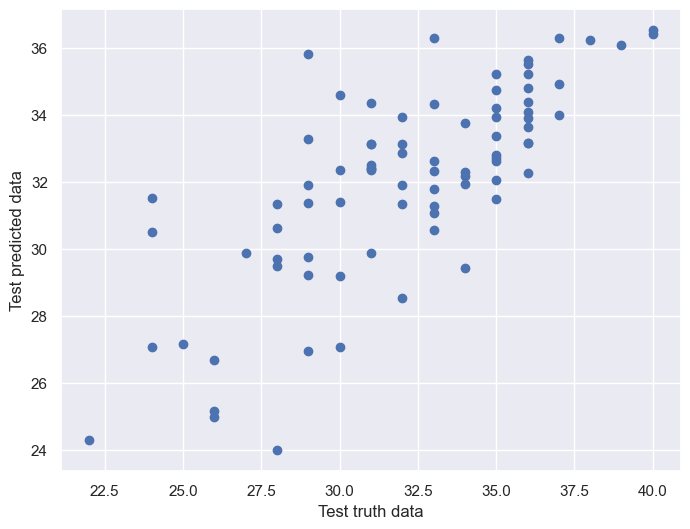

In [576]:
plt.scatter(y_test,regression_predict) #y_test is actual data point and reg_pred is the predicted data points
plt.xlabel('Test truth data')
plt.ylabel('Test predicted data')

In [577]:
#residuals(errors)
residuals=y_test-regression_predict

In [578]:
residuals

162    2.049924
60     1.614804
61     2.848096
63     3.504819
69     2.185915
         ...   
169    0.383230
232   -6.839358
144    1.211713
208   -3.288539
105   -2.278863
Name: Temperature, Length: 81, dtype: float64

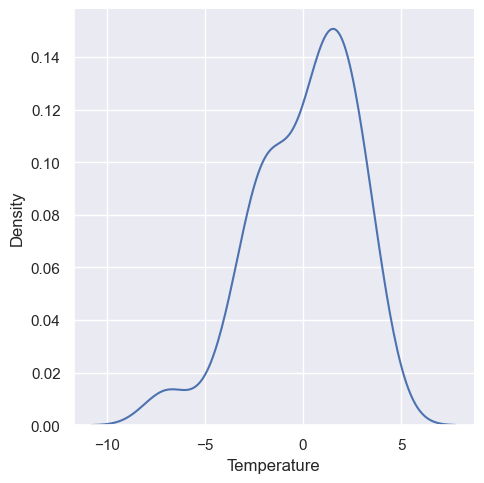

In [579]:
sns.displot(residuals, kind='kde')

* it is somewhat normally distributed there is little skewness that mean we are on right track

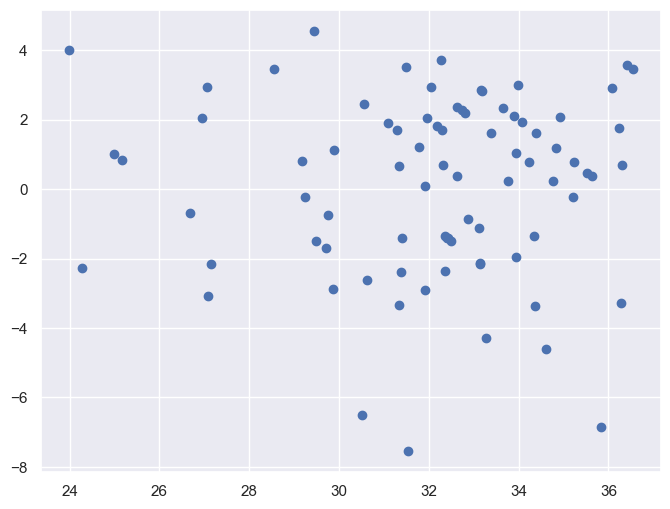

In [580]:
#scatter plot predicted and residual
#uniform distribution
plt.scatter(regression_predict, residuals)


* This above graph is uniformly distributed which mean our model is good

In [581]:
## Performance matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,regression_predict))
print(mean_absolute_error(y_test,regression_predict))
print(np.sqrt(mean_squared_error(y_test,regression_predict)))


6.627629285357463
2.130169384679429
2.5744182421194624


In [582]:
## r square and adjusted r square
from sklearn.metrics import r2_score
score=r2_score(y_test,regression_predict)
print(score)

0.5617340024871462


In [583]:
#adjusted square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.48439294410252487

In [584]:
## RIDGE METHOD
from sklearn.linear_model import Ridge
ridge=Ridge()

In [585]:
ridge

Ridge()

In [586]:
ridge.fit(x_train, y_train)

Ridge()

In [587]:
ridge_predict=ridge.predict(x_test)

In [588]:
ridge.intercept_

32.17791411042945

In [589]:
ridge.coef_

array([-0.14619829, -0.30190224, -1.13709114, -0.5902877 , -0.21075234,
        1.04080638, -0.23018251,  0.96785885,  0.2909918 , -0.24916364,
        0.01239484,  0.27885902])

### Assumption in the ridge
`

Text(0, 0.5, 'predicted data')

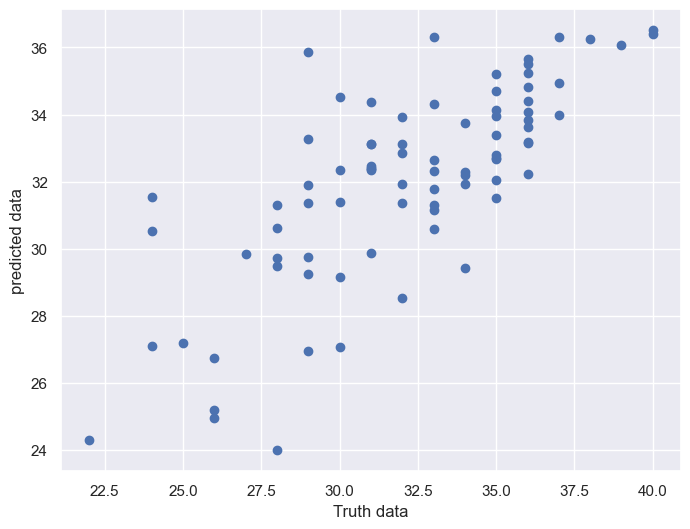

In [590]:
plt.scatter(y_test,ridge_predict)
plt.xlabel('Truth data')
plt.ylabel('predicted data')

* we have plotted the data points we had and predicted data points in above graph

In [591]:
#residuals(error)
ridge_residual=y_test-ridge_predict

In [592]:
ridge_residual

162    2.053408
60     1.615646
61     2.850887
63     3.495533
69     2.190984
         ...   
169    0.361955
232   -6.862651
144    1.203666
208   -3.318979
105   -2.291865
Name: Temperature, Length: 81, dtype: float64

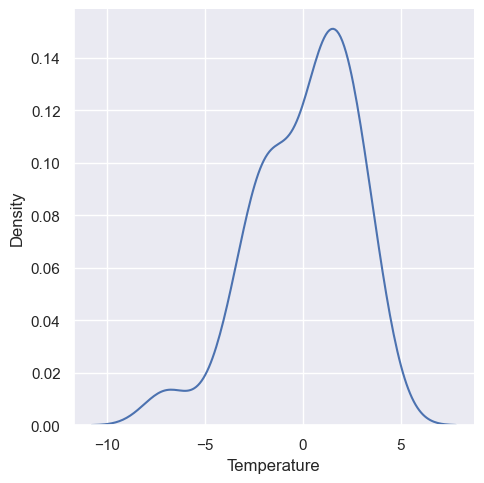

In [593]:
sns.displot(ridge_residual, kind='kde')

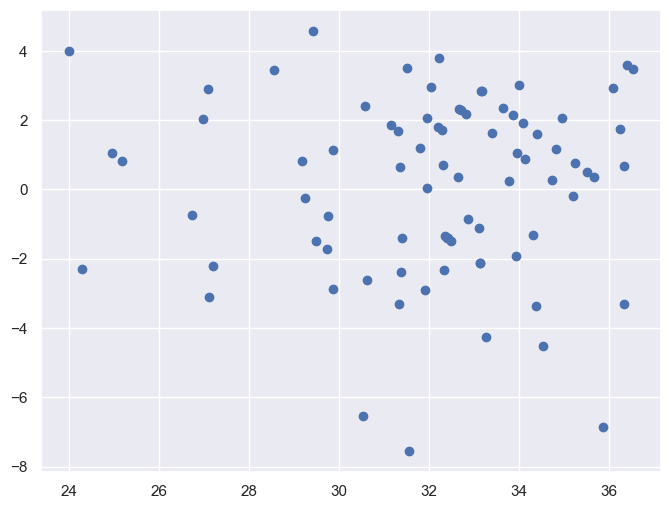

In [595]:
#scatter plot predicted and residual
#uniform distribution
plt.scatter(ridge_predict, ridge_residual)


In [596]:
##performance matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, ridge_predict))
print(mean_absolute_error(y_test, ridge_predict))
print(np.sqrt(mean_squared_error(y_test, ridge_predict)))


6.629150710969144
2.1296827050249876
2.5747137143708123


In [598]:
## r square and adjusted r square
from sklearn.metrics import r2_score
ridge_score=r2_score(y_test, ridge_predict)
print(ridge_score)

0.5616333950022319


In [599]:
#adjusted square
1 - (1-ridge_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.48427458235556686

## LASSO method

In [600]:
from sklearn.linear_model import Lasso

In [601]:
lasso=Lasso()

In [602]:
lasso.fit(x_train, y_train)

Lasso()

In [603]:
lasso_predicted=lasso.predict(x_test)

In [604]:
lasso_predicted

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04

In [605]:
lasso.intercept_

32.17791411042945

In [606]:
lasso.coef_

array([ 0.        , -0.        , -0.71955751, -0.        , -0.        ,
        0.89582004,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ])

Text(0, 0.5, 'predicted data')

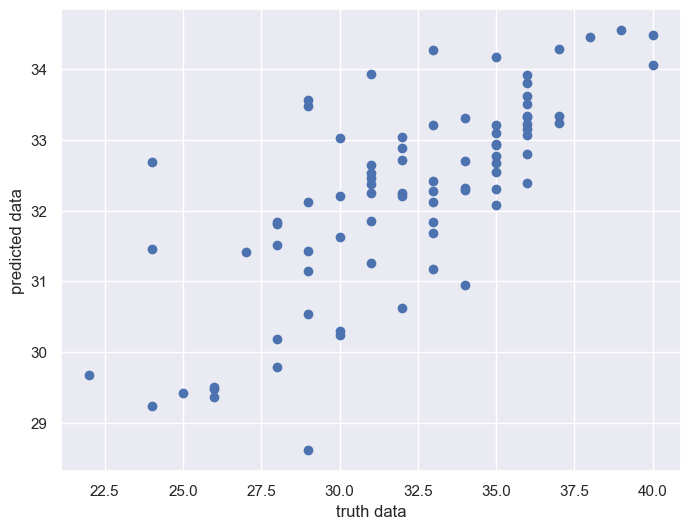

In [607]:
#asssumptions
plt.scatter(y_test,lasso_predicted)
plt.xlabel('truth data')
plt.ylabel('predicted data')

In [608]:
# residuals(errors)
lasso_residuals=y_test-lasso_predicted

In [609]:
lasso_residuals

162    1.702999
60     2.325597
61     2.933905
63     2.926530
69     2.075023
         ...   
169    0.583574
232   -4.568827
144    0.882714
208   -1.267362
105   -7.667085
Name: Temperature, Length: 81, dtype: float64

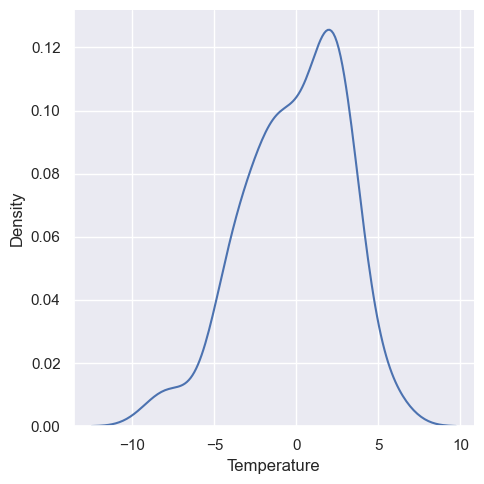

In [610]:
sns.displot(lasso_residuals, kind='kde')

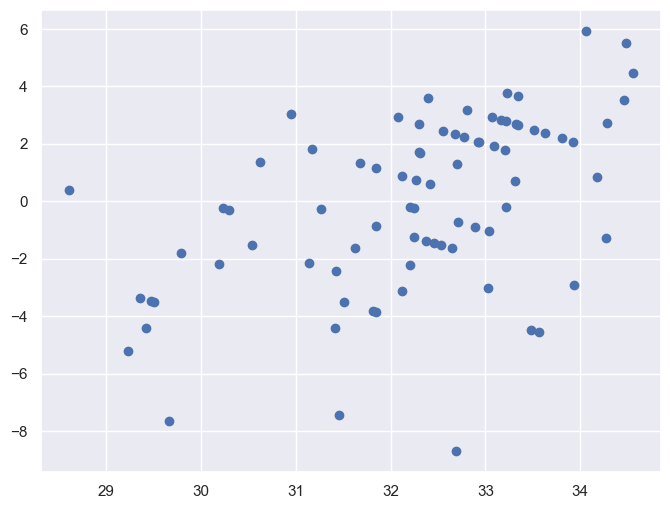

In [611]:
#scatter plot predicted and residual
#uniform distribution
plt.scatter(lasso_predicted, lasso_residuals)


In [612]:
##performance matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,lasso_predicted))
print(mean_absolute_error(y_test,lasso_predicted))
print(np.sqrt(mean_squared_error(y_test,lasso_predicted)))


9.10609532182792
2.4978660766652734
3.0176307464346794


In [613]:
## r square and adjusted r square
from sklearn.metrics import r2_score
lasso_score=r2_score(y_test,lasso_predicted)
print(lasso_score)

0.39784019626969913


In [614]:
#adjusted square
1 - (1-lasso_score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.2915767014937637

## ELASTIC NET

In [617]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()

In [618]:
elastic.fit(x_train, y_train)

ElasticNet()

In [619]:
elastic_predict=elastic.predict(x_test)

In [620]:
elastic_predict

array([31.92432246, 32.96239624, 32.6930103 , 31.76132294, 32.91231226,
       33.99835398, 33.50582876, 32.58799023, 31.92610552, 32.6558967 ,
       33.37128798, 29.89256949, 34.17720843, 30.67449281, 32.61066649,
       32.21191351, 32.78108777, 29.43126208, 35.16385999, 33.9262846 ,
       32.35124274, 33.41315755, 33.51761679, 32.83913611, 35.17248871,
       30.02183234, 32.06808998, 32.54057423, 29.38454508, 32.02749469,
       29.15263769, 28.65371137, 33.20113409, 32.26814555, 32.63219951,
       31.32464844, 30.0438197 , 32.26095879, 29.20834838, 33.99582211,
       32.83468685, 33.54784756, 34.19859975, 31.53047963, 34.53226293,
       33.38100264, 29.30677218, 33.91979982, 33.40346478, 30.35189483,
       31.39035778, 32.29371618, 34.69662869, 31.98984795, 31.35140634,
       30.91573769, 32.36328772, 34.85246248, 31.61958614, 33.4370166 ,
       32.06294666, 32.41245194, 31.23382226, 28.89198737, 31.88599135,
       34.85674748, 30.85304036, 30.99687518, 33.8721744 , 32.87

In [621]:
elastic.intercept_

32.17791411042945

In [622]:
elastic.coef_

array([ 0.        , -0.        , -0.68068073, -0.10914342, -0.01951105,
        0.69882318,  0.07563635,  0.        ,  0.23887714,  0.04260437,
        0.15338562,  0.        ])

Text(0, 0.5, 'predicted data')

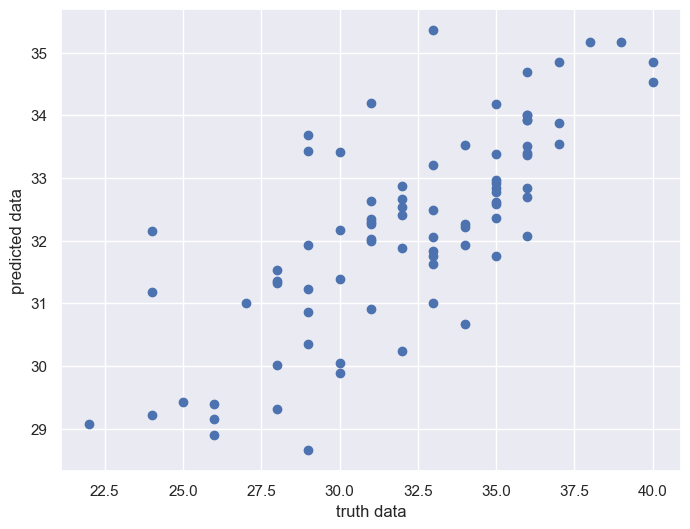

In [623]:
#asssumptions
plt.scatter(y_test,elastic_predict)
plt.xlabel('truth data')
plt.ylabel('predicted data')

In [624]:
# residuals(errors)
resi=y_test-elastic_predict

<AxesSubplot: xlabel='Temperature', ylabel='Density'>

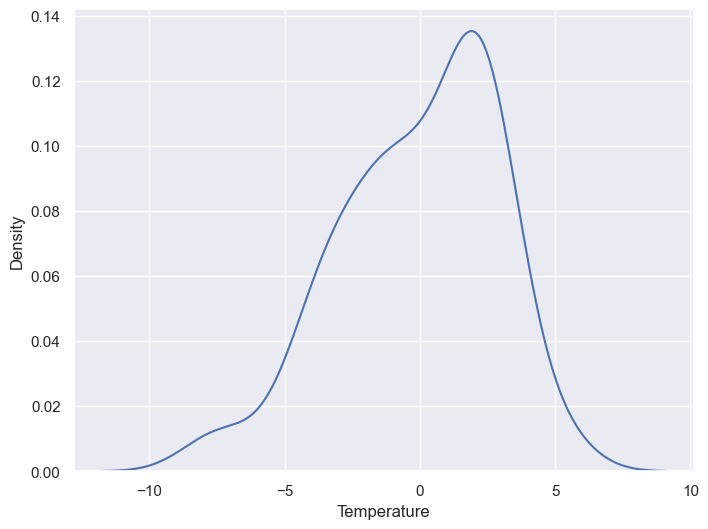

In [625]:
sns.kdeplot(resi)

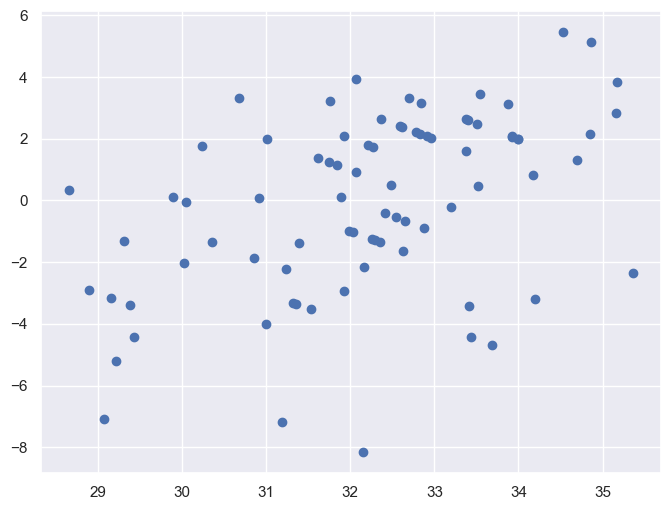

In [626]:
#scatter plot predicted and residual
#uniform distribution
plt.scatter(elastic_predict, resi)


In [627]:
##performance matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, elastic_predict))
print(mean_absolute_error(y_test, elastic_predict))
print(np.sqrt(mean_squared_error(y_test, elastic_predict)))


8.301341909908547
2.389746330326317
2.8812049406296225


In [628]:
## r square and adjusted r square
from sklearn.metrics import r2_score
scorr=r2_score(y_test, elastic_predict)
print(scorr)

0.4510562169071137


In [629]:
#adjusted square
1 - (1-scorr)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.3541837845966045

* as we have performed linear regression, ridge, lasso, elastic net in conclusion we can say tha our model is good and its performance is good